### Compute the continuum

In [100]:
import numpy as np
import class_utils as class_utils
from class_grid import Grid
from class_params import Params
from class_groundstate import groundstate
from class_excitations import excitations
from class_vertices import vertices
from class_perturbation import perturbative
from class_self_energy import Self_Energy
from class_io import IO
from class_plotting import plot2D, plot_cns, plot_omega0
import matplotlib.pyplot as plt

config_path = "config.yml" 

output_dir = class_utils.create_output_dir()

config = class_utils.read_config(config_path)

Lx = config["grid"]["Lx"]
Ly = config["grid"]["Ly"]

N = 4
dJUs = np.linspace(**config["lists"]["dJUs"])
muU = eval(config["physics"]["muU"])

UIB = config["physics"]["UIB"]
cutoff = config["physics"]["cutoff"]
dJUs = np.linspace(**config["lists"]["dJUs"])

grid = Grid(Lx, Ly)

epss = np.zeros((len(dJUs), Lx * Ly * N))
omegs = np.zeros((len(dJUs), Lx * Ly * N))
dJUs_rep = np.zeros((len(dJUs), Lx * Ly * N))
for dJU_ind in range(0, len(dJUs)):
    dJU = dJUs[dJU_ind]
    params = Params(N, dJU, muU, UIB, cutoff)
    gs = groundstate(params)
    cns = gs.cns()
    n0 = gs.n0(cns)
    psi0 = gs.psi0(cns)
    exc = excitations(grid, params, gs, cns)
    uks, vks, omegaklambda = exc.calculate_matrices()
    verts = vertices(grid, gs, uks, vks, cns, n0)

    Epol = 0
    self_energy = Self_Energy(Epol, grid, params, verts, omegaklambda)
    omegs[dJU_ind, :] = self_energy.omega_vec()
    epss[dJU_ind, :] = dJU * self_energy.epsI_vec()
    dJUs_rep[dJU_ind, :] = np.ones(Lx * Ly * N) * dJU
    
continuum = omegs + epss

# io = IO()
# io.save_to_hdf5_fixed_chemical_potentials(grid, params, dJUs, en_vector, omega0s, omega1s, omega2s, T11, T12, T21, T22, T22_F, SE_SI)

/var/folders/ss/8jmv74q91hx88tdtr0hdx12c0000gn/T/ipykernel_93766/2364163161.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  T11mat [dJU_ind, :] = T11[dJU_ind]


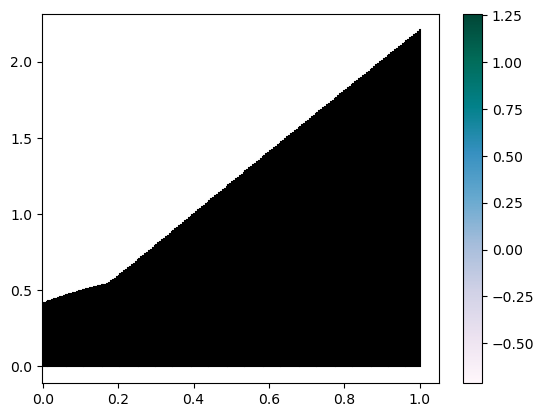

In [122]:
from class_io import IO

UIB, muU, M, N = 0.2, 0.41, 100, 7  # replace with your actual values

io = IO()
dJUs, en_vector, omega0s, omega1s, omega2s, T11, T12, T21, T22, T22_SE, SE_SI = io.read_from_hdf5_all_fixed_chemical_potential(UIB, muU, M, N)
from matplotlib import pyplot as plt
import numpy as np

SpectralFuncs = np.zeros((len(dJUs), len(en_vector)))
T11mat = np.zeros((len(dJUs), len(en_vector)))
dOmega = en_vector[1] - en_vector[0]
eta = 0.01
for dJU_ind in range(0, len(dJUs)):
    dJU = dJUs[dJU_ind]
    SpectralFuncs[dJU_ind, :] = dOmega * (-2) * np.imag(1./(en_vector - (T11[dJU_ind] + T12[dJU_ind] + T21[dJU_ind] + T22[dJU_ind] + T22_SE[dJU_ind])+ 1j * eta))
    T11mat [dJU_ind, :] = T11[dJU_ind]
# SpectralFuncs[34, :] = SpectralFuncs[33, :]
# SpectralFuncs[35, :] = SpectralFuncs[36, :]
fig = plt.figure(); 
X, Y = np.meshgrid(dJUs, en_vector)
pc = plt.pcolormesh(X, Y, T11mat.T , shading='auto', cmap='PuBuGn'); 
# cbar = fig.colorbar(pc); 
# plt.plot(dJUs, omega0s + omega1s + omega2s, linestyle='--', label='Perturbative', color='red', linewidth=1.5)
for dJU_ind in range(0, len(dJUs)):
    plt.plot(dJUs_rep[dJU_ind,Lx * Ly : Lx * Ly * (N - 1)], omegs[dJU_ind, Lx * Ly : Lx * Ly * (N - 1) ], label="Continuum", color="black")

plt.show()

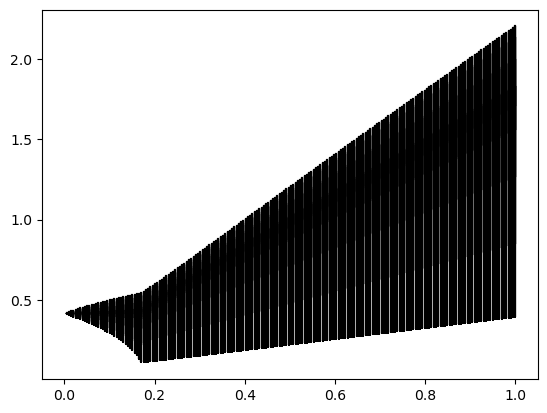

In [115]:
for dJU_ind in range(0, len(dJUs)):
    plt.plot(dJUs_rep[dJU_ind,Lx * Ly : Lx * Ly * (N - 1)], omegs[dJU_ind, Lx * Ly : Lx * Ly * (N - 1) ], label="Continuum", color="black")
plt.show()


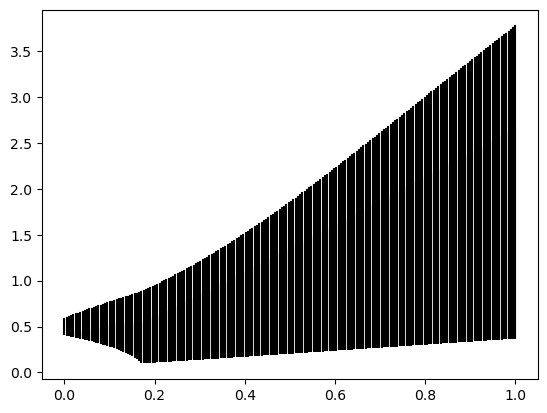

In [110]:
for dJU_ind in range(0, len(dJUs)):
    plt.plot(dJUs_rep[dJU_ind,Lx * Ly : Lx * Ly * N ], omegas[dJU_ind, Lx * Ly : Lx * Ly * N ], label="Continuum", color="black")
plt.show()


In [99]:
import numpy as np
import class_utils as class_utils
from class_grid import Grid
from class_params import Params
from class_groundstate import groundstate
from class_excitations import excitations
from class_vertices import vertices
from class_perturbation import perturbative
from class_self_energy import Self_Energy
from class_io import IO
from class_plotting import plot2D, plot_cns, plot_omega0
import matplotlib.pyplot as plt

config_path = "config.yml" 

output_dir = class_utils.create_output_dir()

config = class_utils.read_config(config_path)

Lx = 10
Ly = 10

N = config["physics"]["N"]
dJUs = np.linspace(**config["lists"]["dJUs"])
muU = eval(config["physics"]["muU"])

UIB = config["physics"]["UIB"]
cutoff = config["physics"]["cutoff"]
dJUs = np.linspace(**config["lists"]["dJUs"])

grid = Grid(Lx, Ly)
KXs = grid.KXs
KYs = grid.KYs

cont = np.zeros((len(dJUs), Lx * Ly * N))
omegas =  np.zeros((len(dJUs), Lx * Ly * N))
epsilons =  np.zeros((len(dJUs), Lx * Ly * N))
omegas1 = np.zeros(len(KXs))
omegas2 = np.zeros(len(KXs))
omegas3 = np.zeros(len(KXs))
omegas_1 = np.zeros(len(KXs))
omegas_2 = np.zeros(len(KXs))
omegas_3 = np.zeros(len(KXs))
for dJU_ind in range(len(dJUs)):
    dJU = dJUs[dJU_ind]
    # print(dJU)
    params = Params(N, dJU, muU, UIB, cutoff)
    gs = groundstate(params)
    cns = gs.cns()
    n0 = gs.n0(cns)
    psi0 = gs.psi0(cns)
    exc = excitations(grid, params, gs, cns)
    uks, vks, omegaklambda = exc.calculate_matrices()
    for lambda_ in range(3):
        for kx in range(Lx):
            for ky in range(Ly):
                indk = lambda_ * Lx * Lx + kx * Ly + ky
                omegas[dJU_ind, indk] = omegaklambda[lambda_, kx, ky]
                epsilons[dJU_ind, indk] = dJU * self_energy.epsI(KXs[kx], KYs[ky])
                cont[dJU_ind, indk] =  omegas[dJU_ind, indk] + epsilons[dJU_ind, indk]
                # if (kx == ky):
                #     omegas1[kx] = omegaklambda[1, kx, ky] 
                #     omegas2[kx] = omegaklambda[2, kx, ky]
                #     omegas3[kx] = omegaklambda[3, kx, ky]
                #     omegas_1[kx] = omegaklambda[1, kx, ky] +  dJU * self_energy.epsI(KXs[kx], KYs[ky])
                #     omegas_2[kx] = omegaklambda[2, kx, ky]  +  dJU * self_energy.epsI(KXs[kx], KYs[ky])
                #     omegas_3[kx] = omegaklambda[3, kx, ky]  +  dJU * self_energy.epsI(KXs[kx], KYs[ky])


# plt.plot(KXs, omegas1, label = 'omega1')
# plt.plot(KXs, omegas2, label = 'omega2')
# plt.plot(KXs, omegas3, label = 'omega3')

# plt.plot(KXs, omegas_1, label = 'omega1+', linestyle = 'dashed')
# plt.plot(KXs, omegas_2, label = 'omega2+', linestyle = 'dashed')
# plt.plot(KXs, omegas_3, label = 'omega3+', linestyle = 'dashed') 
# plt.legend()
# plt.show()


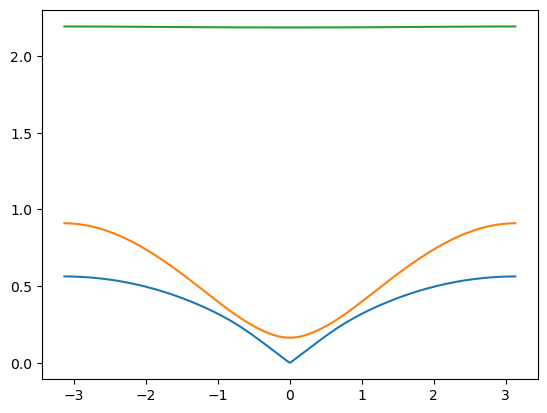

In [55]:
plt.plot(KXs, omegas1, label = 'omega1')
plt.plot(KXs, omegas2, label = 'omega2')
plt.plot(KXs, omegas3, label = 'omega3')

0.20100502512562815


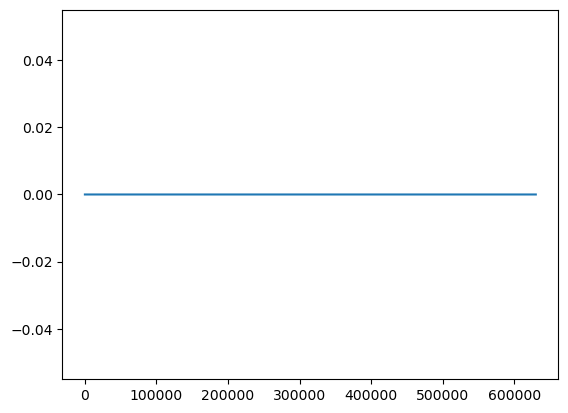

In [60]:
ind = 40
print(dJUs[ind])
plt.plot(cont[ind,:])

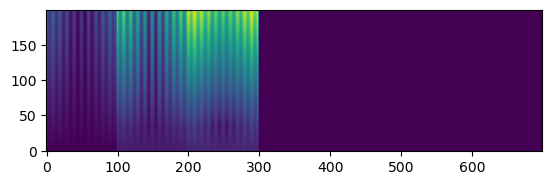

In [72]:
plt.imshow(cont, origin = 'lower')